In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-campaign/marketing.csv


# Marketing Campaign Analysis

### Project Objective: 
Checking the performance of campaigns on different marketing channels among control & experiment groups and also among different age groups and investigate reasons for high performance or underperformance of channels.

### Dataset: 
Data is for 1 month (1st-31st January) & important variables are marketing channel, ad display language, user preferred language, age group, subscribing channel etc.

### Methodolgy: 
In my analysis I have calculated & plotted conversion rates across channels, age groups, control/experiment group and days of the week to gauge the performance and derive insights. And after that have done A/B testing to validate the inferences/insights.

In [2]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/marketing-campaign/marketing.csv")
df.head()                

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [5]:
# Check missing values 

df.isnull().sum() 

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

### Data Cleaning: 
Analysing individual columns & fixing data types

#### User ID

In [6]:
print("duplicates" ,df['user_id'].duplicated().sum())
print("unique" ,df['user_id'].nunique())

duplicates 2728
unique 7309


In [7]:
id_len = df['user_id'].apply(lambda x: len(x))
id_len.unique()            # Thus, lengths are 9 or 10

array([10,  9])

In [8]:
df['user_id'].astype(str).str[0].unique()     # All ids starts with a 

array(['a'], dtype=object)

#### Date Served

In [9]:
# Type is obj, fixing it

df['date_served'].tail()        # format is mm/dd/yy

10032    1/17/18
10033    1/17/18
10034     1/5/18
10035    1/17/18
10036     1/6/18
Name: date_served, dtype: object

In [10]:
df['date_served'] = pd.to_datetime(df['date_served'])
df['date_served'].tail()       # format is yyyy-mm-dd

10032   2018-01-17
10033   2018-01-17
10034   2018-01-05
10035   2018-01-17
10036   2018-01-06
Name: date_served, dtype: datetime64[ns]

In [11]:
df[df['date_served'].isnull()].head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
7038,a100004504,NaT,House Ads,personalization,False,English,English,19-24 years,NaN,NaN,NaN,NaN
9944,a10009231,NaT,NaN,control,NaN,English,English,19-24 years,NaN,NaN,NaN,NaN
9945,a10009232,NaT,NaN,control,NaN,English,English,24-30 years,NaN,NaN,NaN,NaN
9946,a10009233,NaT,NaN,control,NaN,English,English,30-36 years,NaN,NaN,NaN,NaN
9947,a10009234,NaT,NaN,control,NaN,English,English,36-45 years,NaN,NaN,NaN,NaN


In [12]:
df['date_served'].value_counts()

# Thus on 15th Jan highest number of customer were served

2018-01-15    789
2018-01-02    417
2018-01-16    391
2018-01-03    388
2018-01-01    375
2018-01-17    374
2018-01-31    347
2018-01-10    342
2018-01-04    336
2018-01-27    331
2018-01-05    331
2018-01-30    330
2018-01-28    330
2018-01-29    328
2018-01-20    321
2018-01-18    320
2018-01-08    319
2018-01-06    315
2018-01-09    315
2018-01-11    314
2018-01-14    309
2018-01-13    308
2018-01-19    308
2018-01-12    306
2018-01-07    281
2018-01-21    234
2018-01-26    225
2018-01-24    193
2018-01-25    186
2018-01-22    182
2018-01-23    176
Name: date_served, dtype: int64

#### Converted and Is_retained

In [13]:
df['converted'] = df['converted'].map({True:1, False:0}).astype('float64')
df['is_retained'] = df['is_retained'].map({True:1, False:0}).astype('float64')

# Could not be converted to int due to null values

#### Age Group

In [14]:
df["age_group"].value_counts()

19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64

In [15]:
df['age_group'] = df['age_group'].str.replace(" years","")
df['age_group'].value_counts()

19-24    1682
24-30    1568
0-18     1539
30-36    1355
36-45    1353
45-55    1353
55+      1187
Name: age_group, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  float64       
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   object        
 9   date_canceled        577 non-null    object        
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 941.1+ KB


#### date_subscribed and date_canceled

In [17]:
df['date_subscribed']=pd.to_datetime(df['date_subscribed'])
df['date_canceled']=pd.to_datetime(df['date_canceled'])

In [18]:
# Creating new column - day of week for subscription for future analysis
df['DOW_subscribed']=df['date_subscribed'].dt.strftime("%a")
df['DOW_subscribed'].value_counts()

Tue    386
Wed    352
Mon    306
Thu    226
Fri    199
Sun    196
Sat    191
Name: DOW_subscribed, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  float64       
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   float64       
 12  DOW_subscribed       1856 non-null   object        
dtypes: datetime64[ns](3), float64(2

#### Marketing Channel

In [20]:
df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

#### Variant

In [21]:
df['variant'].value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

#### Language

In [22]:
df['language_displayed'].value_counts()

English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64

In [23]:
df['language_preferred'].value_counts()

English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64

In [24]:
# Checking if language displayed and language preferred are same

df['is_language_correct']=(df['language_displayed']==df['language_preferred'])
print("Language is not correct for {} observations".format(df['is_language_correct'].count()-
                                                           df['is_language_correct'].sum()))

Language is not correct for 522 observations


#### Data cleaning is done, reviewing the cleaned data

In [25]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DOW_subscribed,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,True
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,True
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,True
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,True
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,True


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  float64       
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   float64       
 12  DOW_subscribed       1856 non-null   object        
 13  is_language_correct  10037 non-

## Exploratory Data Analysis

### Daily Marketing Reach by Channel

In [27]:
print('Unique total users: {}'.format(df['user_id'].nunique()))
print("Unique users converted: {}".format(df.loc[df['converted']==1,'user_id'].nunique()))

Unique total users: 7309
Unique users converted: 1015


### Marketing Channel Analysis

In [28]:
channel_count = df['marketing_channel'].value_counts(sort=True,ascending=False)
channel_count

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

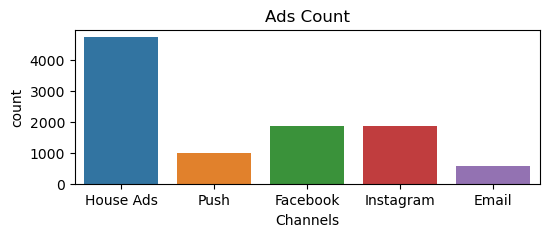

In [29]:
plt.figure(figsize=(6,2))
sns.countplot(data=df, x='marketing_channel')
plt.xlabel("Channels")
plt.title("Ads Count", fontsize=12)
plt.show()

In [30]:
# Marketing Channel and Date Served Analysis

  # Pivoting the ads count by channel

daily_ads_count=df.pivot_table(values="user_id",index="date_served", columns="marketing_channel", aggfunc=len)
daily_ads_count.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1,69,191,78,36
2018-01-02,4,64,250,63,36
2018-01-03,2,63,220,66,37
2018-01-04,2,66,168,64,36
2018-01-05,1,64,160,70,36
2018-01-06,5,64,152,65,29
2018-01-07,3,52,132,60,34
2018-01-08,1,67,154,65,32
2018-01-09,2,59,157,60,37


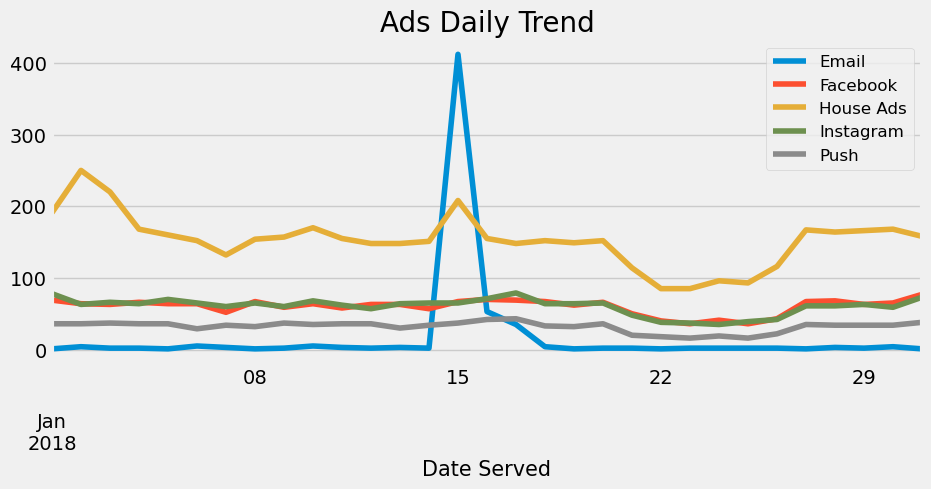

In [31]:
plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line',figsize=(10,4))
plt.xlabel("Date Served",size=15);
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12)

#### Insights:

1. There was an **`Email Blast`** on 15th of the month and has been negligible otherwise
2. House ads are bulk of the chunk but has been fluctauting
3. Facebook, Insta and Push ads have remained flat throughout the month

In [32]:
# Marketing Channel and Converted column Analysis

conversion_df = df.groupby('marketing_channel').agg(
    conversions = ('converted', 'sum'),
    ads = ('converted', 'count') ).reset_index()     
conversion_df

,marketing_channel,conversions,ads
0,Email,193.0,565
1,Facebook,237.0,1860
2,House Ads,298.0,4733
3,Instagram,265.0,1871
4,Push,83.0,993


In [33]:
conversion_df['conversion_rate'] = round((conversion_df['conversions']/conversion_df['ads'])*100,2)
conversion_df

,marketing_channel,conversions,ads,conversion_rate
0,Email,193.0,565,34.16
1,Facebook,237.0,1860,12.74
2,House Ads,298.0,4733,6.30
3,Instagram,265.0,1871,14.16
4,Push,83.0,993,8.36


#### Insights:
- Overall `email` has *high conversion rate* and seems like `house ads` which are highest of the lot has *least conversion rate*, so why ad allocation towards a low converting channel is hightest needs to be checked.

In [34]:
# Marketing Channel and Variant (Control & Experimemt/Personalized Groups) Analyis

Converted_variant_df = df.groupby(['variant','marketing_channel']).agg(
                        converted = ('converted', 'sum'),
                        ads = ('converted', 'count')).reset_index()
Converted_variant_df

,variant,marketing_channel,converted,ads
0,control,Email,80.0,274
1,control,Facebook,52.0,894
2,control,House Ads,172.0,2552
3,control,Instagram,52.0,888
4,control,Push,15.0,468
5,personalization,Email,113.0,291
6,personalization,Facebook,185.0,966
7,personalization,House Ads,126.0,2181
8,personalization,Instagram,213.0,983
9,personalization,Push,68.0,525


In [35]:
Converted_variant_df['conversion_rate'] = round((Converted_variant_df['converted']/Converted_variant_df['ads'])*100,2)
Converted_variant_df

,variant,marketing_channel,converted,ads,conversion_rate
0,control,Email,80.0,274,29.20
1,control,Facebook,52.0,894,5.82
2,control,House Ads,172.0,2552,6.74
3,control,Instagram,52.0,888,5.86
4,control,Push,15.0,468,3.21
5,personalization,Email,113.0,291,38.83
6,personalization,Facebook,185.0,966,19.15
7,personalization,House Ads,126.0,2181,5.78
8,personalization,Instagram,213.0,983,21.67
9,personalization,Push,68.0,525,12.95


In [36]:
print(Converted_variant_df.groupby('variant')['converted'].sum())
print(Converted_variant_df.groupby('variant')['ads'].sum())

variant
control            371.0
personalization    705.0
Name: converted, dtype: float64
variant
control            5076
personalization    4946
Name: ads, dtype: int64


#### Insights:
1. Although the total ads where divided equally among control and personalized ads and shared, however the personalized ads leads to better conversions rathern than control ads.
2. In particular the **`personalized emails`** has overall highest conversion rate. 

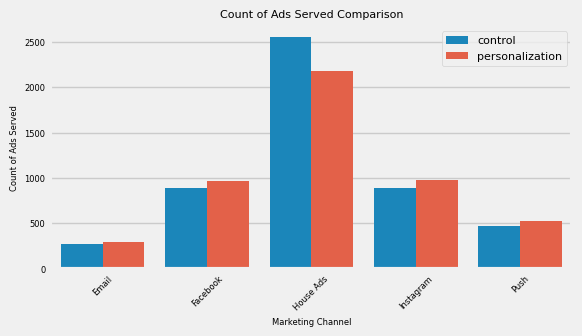

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,3))
sns.barplot(data=Converted_variant_df, x='marketing_channel', y='ads', hue='variant')

plt.title("Count of Ads Served Comparison", size= 8)
plt.xlabel("Marketing Channel",size = 6)
plt.ylabel("Count of Ads Served", size = 6)
plt.legend(loc='upper right', fontsize= 8)
plt.xticks(rotation=45, size = 6)
plt.yticks(size = 6)
plt.show()

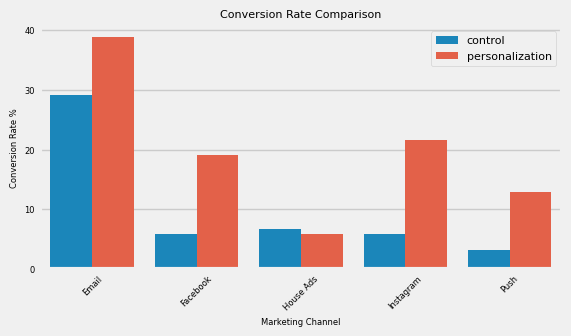

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,3))
sns.barplot(data=Converted_variant_df, x='marketing_channel', y='conversion_rate', hue='variant')

plt.title("Conversion Rate Comparison", size= 8)
plt.xlabel("Marketing Channel",size = 6)
plt.ylabel("Conversion Rate %", size = 6)
plt.legend(loc='upper right', fontsize= 8)
plt.xticks(rotation=45, size = 6)
plt.yticks(size = 6)
plt.show()

### Retention Rate 

In [39]:
converted_df=df[df['converted']==1] 

In [40]:
total = converted_df['user_id'].nunique()
retained = converted_df[converted_df['is_retained']==1]['user_id'].nunique()
print("Retention Rate: {}%".format(100*round(retained/total,1)))

Retention Rate: 60.0%


### Conversions Analysis by Marketing Channel and Age Group

In [41]:
# Marketing Channel and Age Group Analysis

age_df = df.pivot_table(values='user_id',index=['marketing_channel','converted'],columns='age_group',aggfunc=len)
age_df

age_group                    0-18  19-24  24-30  30-36  36-45  45-55  55+
marketing_channel converted                                              
Email             0.0          54     59     68     47     51     50   43
                  1.0          39     52     52     13     12     15   10
Facebook          0.0         215    269    247    228    213    290  161
                  1.0          49     78     49     21     13      9   18
House Ads         0.0         636    703    623    668    558    647  600
                  1.0          58     58     58     31     31     31   31
Instagram         0.0         261    214    230    246    261    207  187
                  1.0          39    101     56     13     19     20   17
Push              0.0         170    120    160     82    190     77  111
                  1.0          16     25     23      4      3      5    7

In [42]:
converted_age_df = df.groupby(['marketing_channel', 'age_group']).agg(
                        converted = ('converted', 'sum'),
                        ads = ('converted', 'count')).reset_index()
converted_age_df['conversion_rate'] = round((converted_age_df['converted']/converted_age_df['ads'])*100,2)
converted_age_df

,marketing_channel,age_group,converted,ads,conversion_rate
0,Email,0-18,39.0,93,41.94
1,Email,19-24,52.0,111,46.85
2,Email,24-30,52.0,120,43.33
3,Email,30-36,13.0,60,21.67
4,Email,36-45,12.0,63,19.05
5,Email,45-55,15.0,65,23.08
6,Email,55+,10.0,53,18.87
7,Facebook,0-18,49.0,264,18.56
8,Facebook,19-24,78.0,347,22.48
9,Facebook,24-30,49.0,296,16.55


#### Conversion rate fnction
As we have to use this multiple time we can do the above by creating a function

In [43]:
def conversion_rate(df, column_names):
    # Total number of converted users
    column_conv = df[df['converted'] == 1].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = df.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = round(column_conv/column_total,2)
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [44]:
converted_age_df = conversion_rate(df,["marketing_channel","age_group"])
converted_age_df

marketing_channel  age_group
Email              0-18         0.41
                   19-24        0.46
                   24-30        0.45
                   30-36        0.22
                   36-45        0.19
                   45-55        0.22
                   55+          0.19
Facebook           0-18         0.17
                   19-24        0.23
                   24-30        0.17
                   30-36        0.07
                   36-45        0.06
                   45-55        0.03
                   55+          0.09
House Ads          0-18         0.10
                   19-24        0.09
                   24-30        0.10
                   30-36        0.05
                   36-45        0.06
                   45-55        0.05
                   55+          0.06
Instagram          0-18         0.13
                   19-24        0.31
                   24-30        0.19
                   30-36        0.05
                   36-45        0.06
         

In [45]:
converted_age_df=pd.DataFrame(converted_age_df.unstack(level=0))
converted_age_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18,0.41,0.17,0.10,0.13,0.08
19-24,0.46,0.23,0.09,0.31,0.17
24-30,0.45,0.17,0.10,0.19,0.11
30-36,0.22,0.07,0.05,0.05,0.05
36-45,0.19,0.06,0.06,0.06,0.02
45-55,0.22,0.03,0.05,0.07,0.06
55+,0.19,0.09,0.06,0.07,0.05


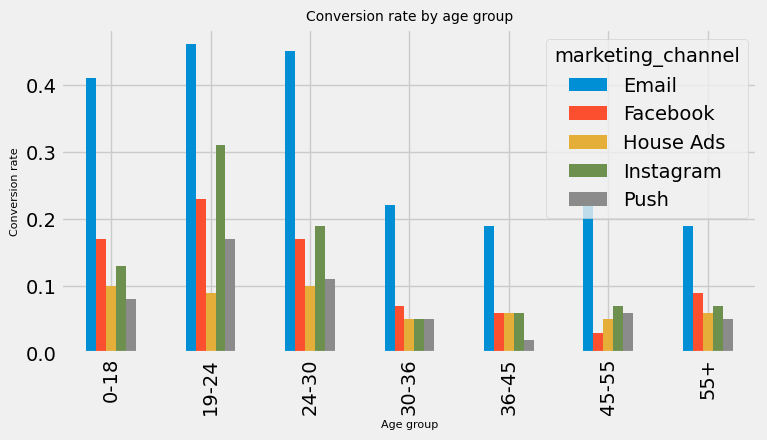

In [46]:
plt.style.use('fivethirtyeight')
converted_age_df.plot(kind='bar',figsize=(8,4))
plt.title('Conversion rate by age group', size = 10)
plt.ylabel('Conversion rate', size = 8)
plt.xlabel('Age group', size = 8);

#### Insights:
- Young age grouups upto 24-30 has high converion rates for across all channels compared to 30-36 & older groups
- House ads have low conversion rates even among young groups

### Conversions Analysis by Marketing Channel and Date Served

In [47]:
converted_date_df = pd.DataFrame(conversion_rate(df,['date_served','marketing_channel']).unstack(level=1))  # level 1 means marketing channel will be in columns
converted_date_df.head(10)

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.12,0.08,0.11,0.08
2018-01-02,1.0,0.10,0.08,0.13,0.06
2018-01-03,0.0,0.08,0.09,0.17,0.08
2018-01-04,0.5,0.14,0.09,0.13,0.06
2018-01-05,1.0,0.11,0.13,0.16,0.03
2018-01-06,0.6,0.11,0.11,0.10,0.07
2018-01-07,1.0,0.10,0.15,0.18,0.09
2018-01-08,1.0,0.14,0.10,0.12,0.06
2018-01-09,0.5,0.12,0.13,0.15,0.05


In [48]:
def plotting_conv(df,kind):
    for column in df.columns:
        plt.style.use('ggplot')
        df[column].plot(kind=kind,figsize=(20,5))
        plt.title(column + ' conversion rate', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.grid(False)
        plt.show()

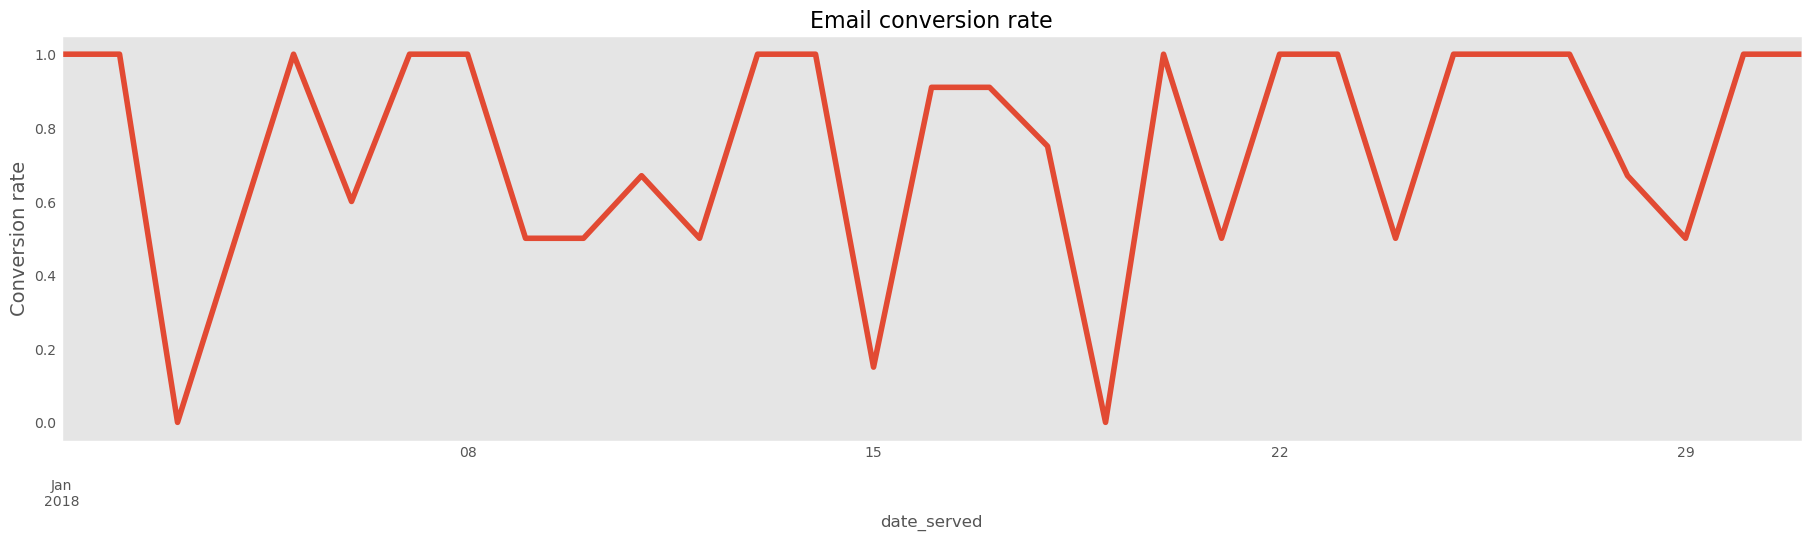

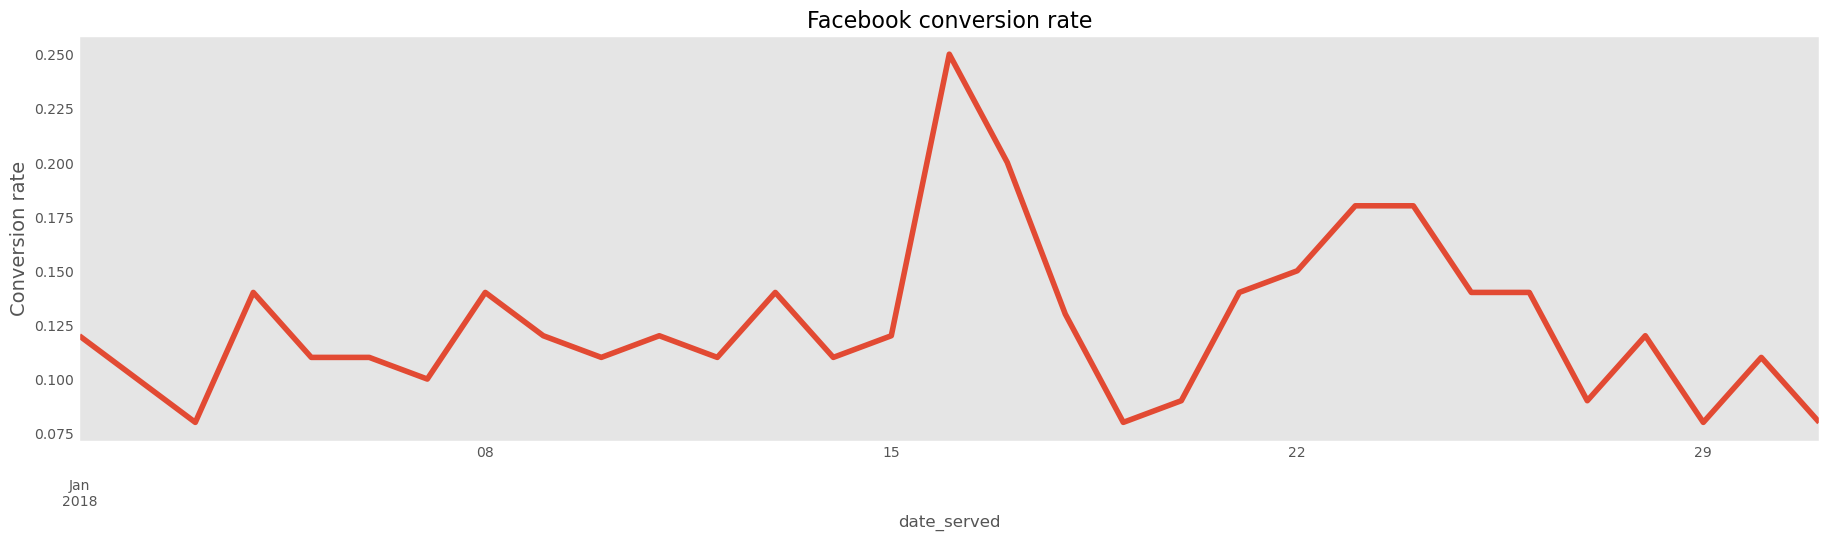

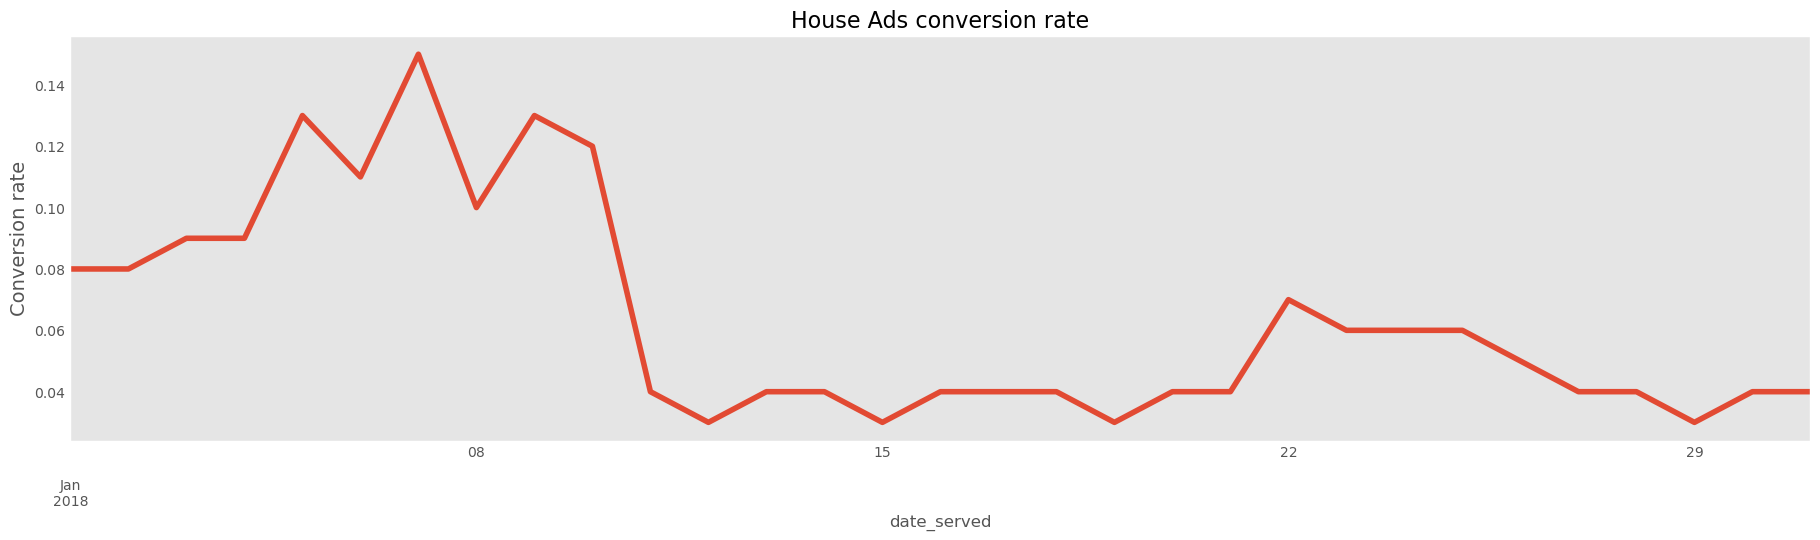

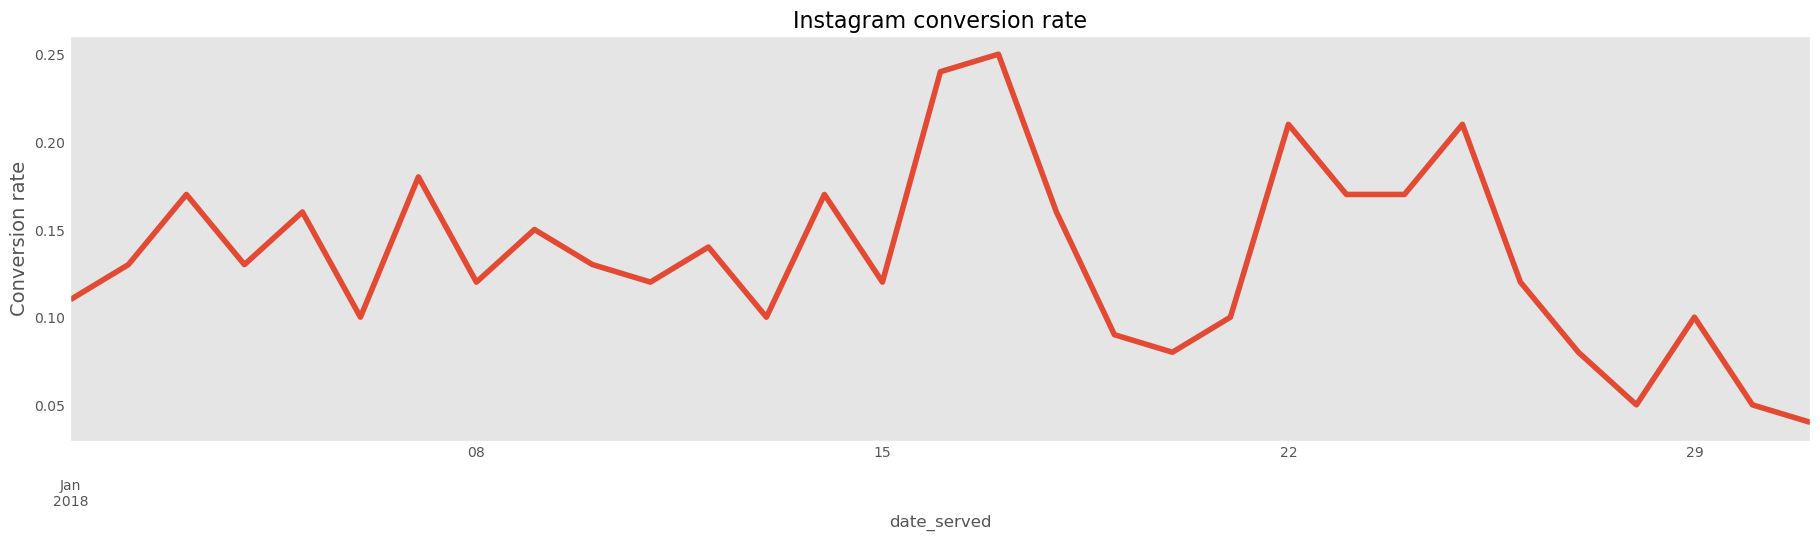

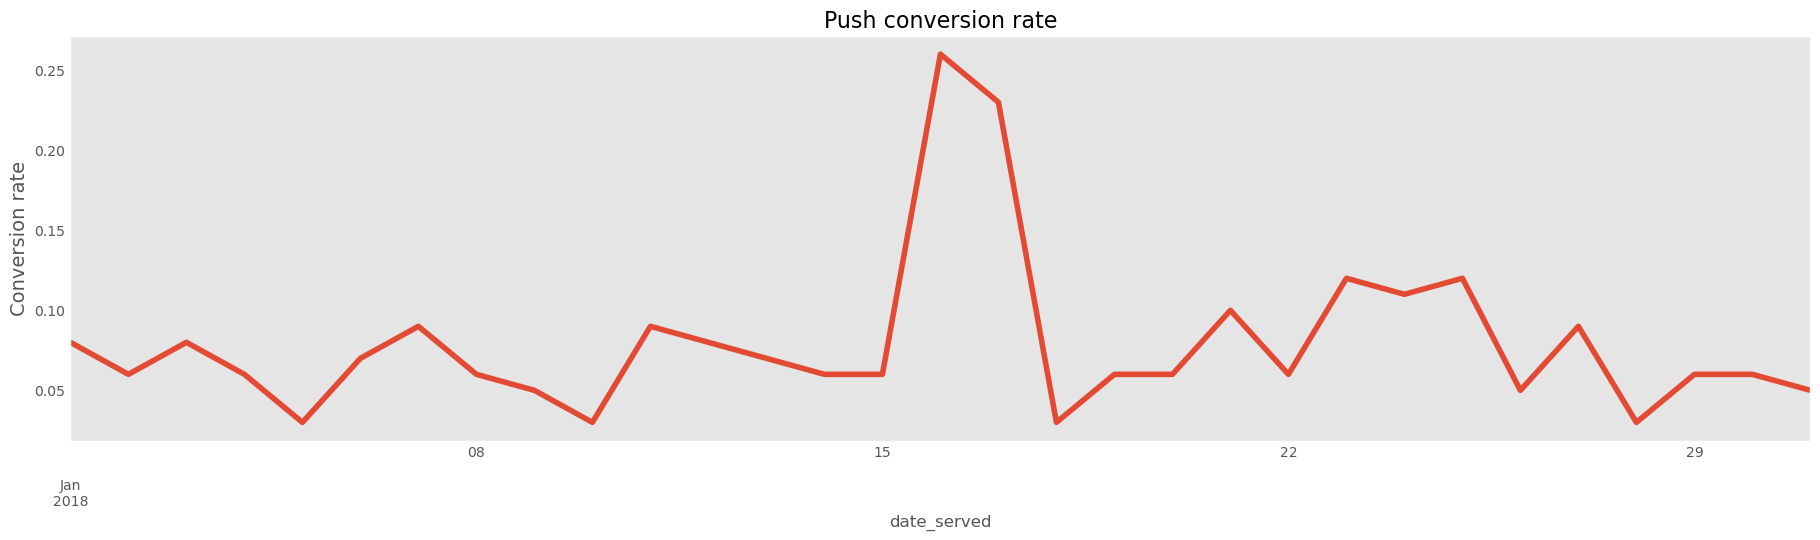

In [49]:
plotting_conv(converted_date_df,"line")

#### Insights:
- All channels except house ads have high daily fluctuations in coversion rates
- **House ads conversions have gone down drastically after 10th, needs to be investigated**

#### Conversion Analysis by Age-group and date served

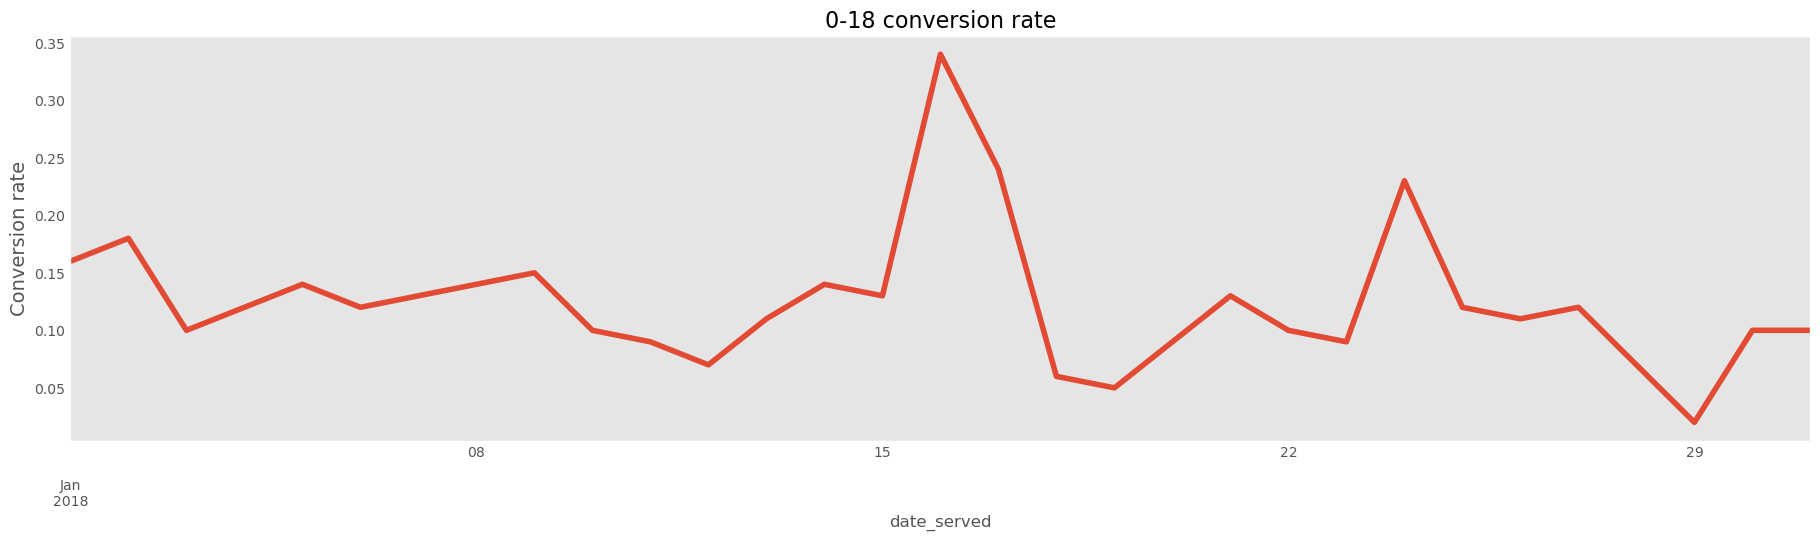

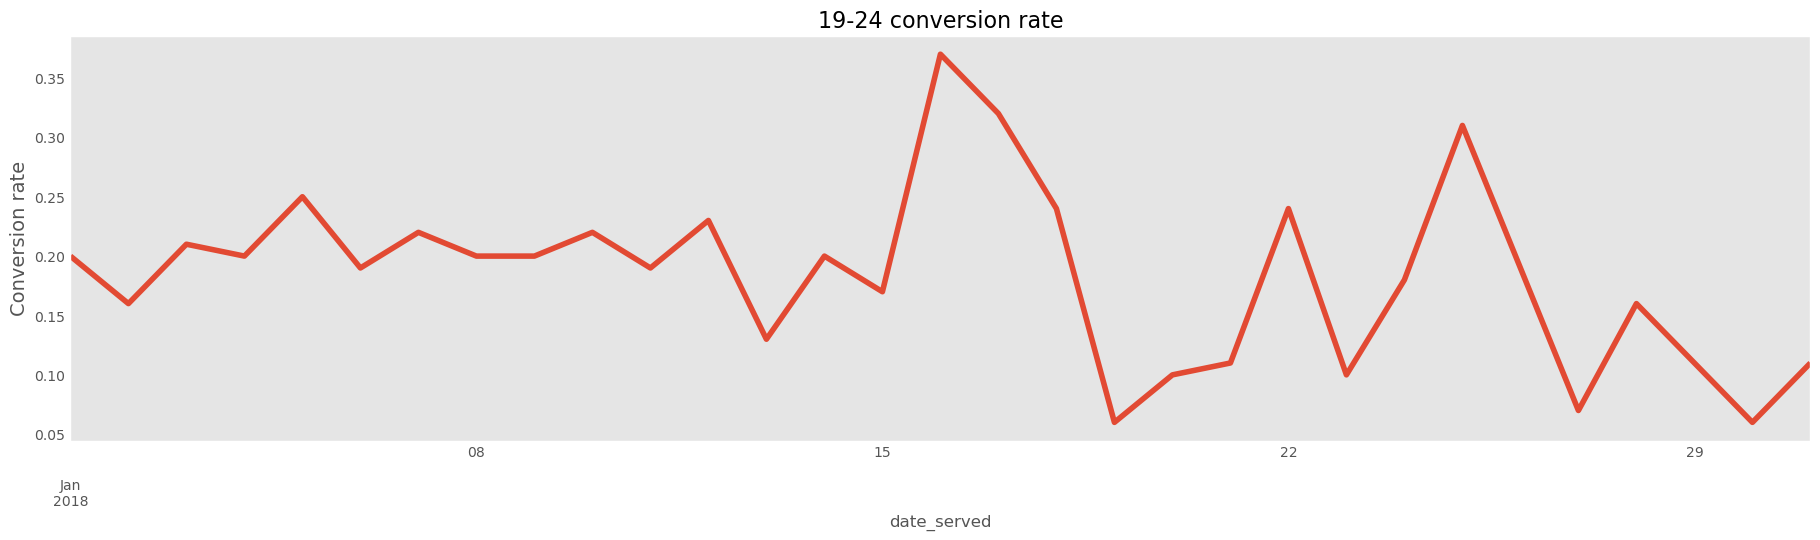

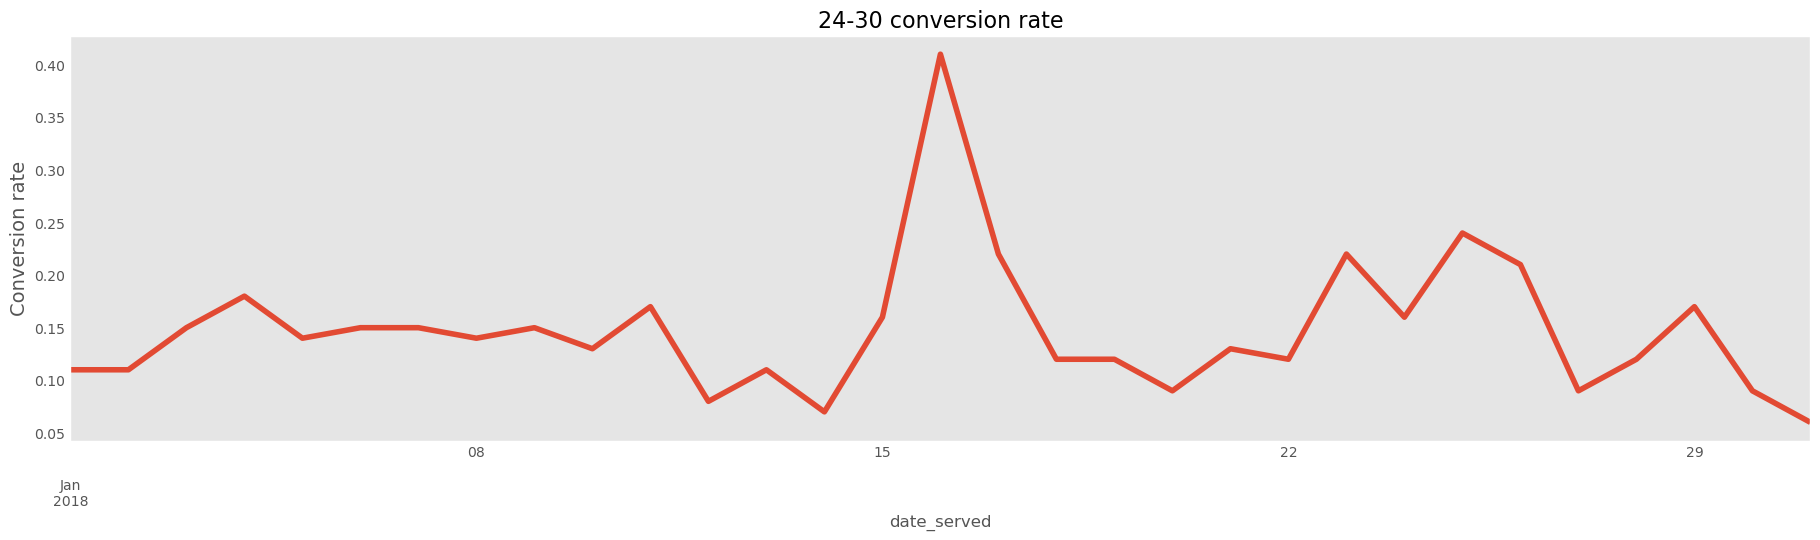

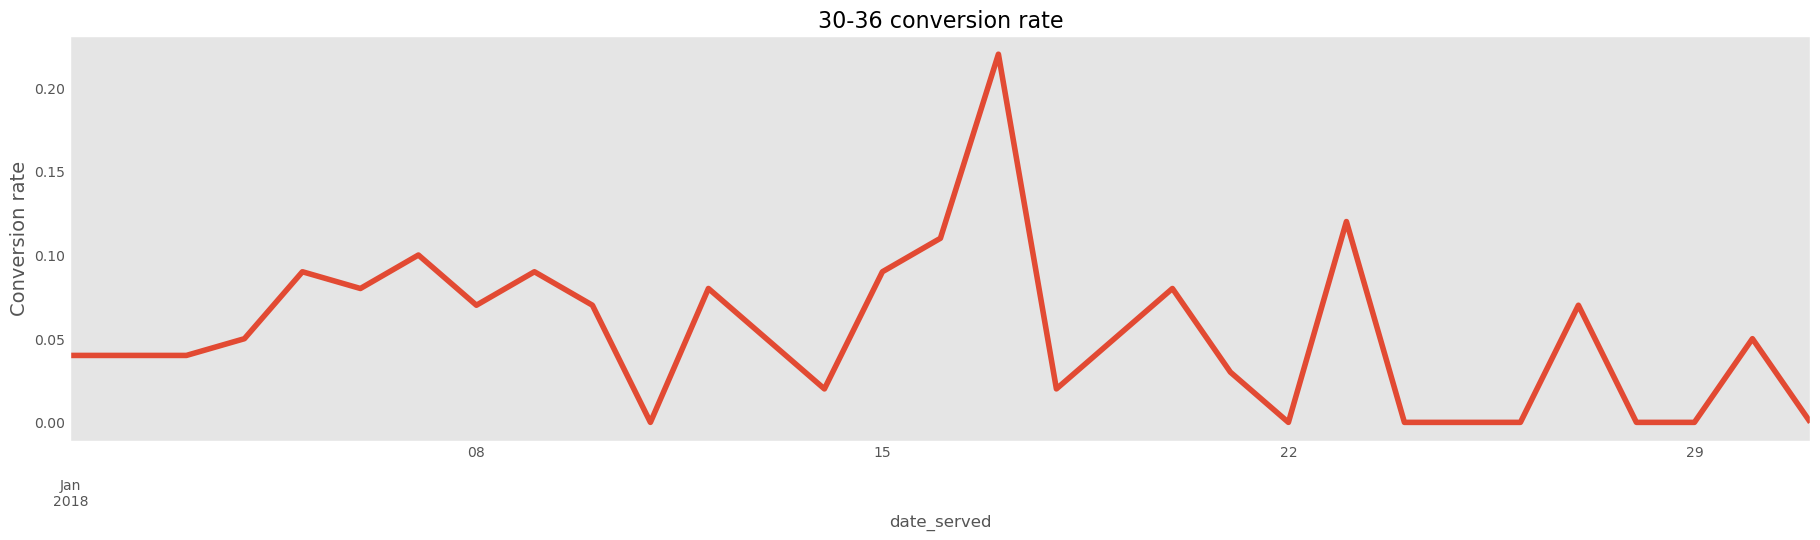

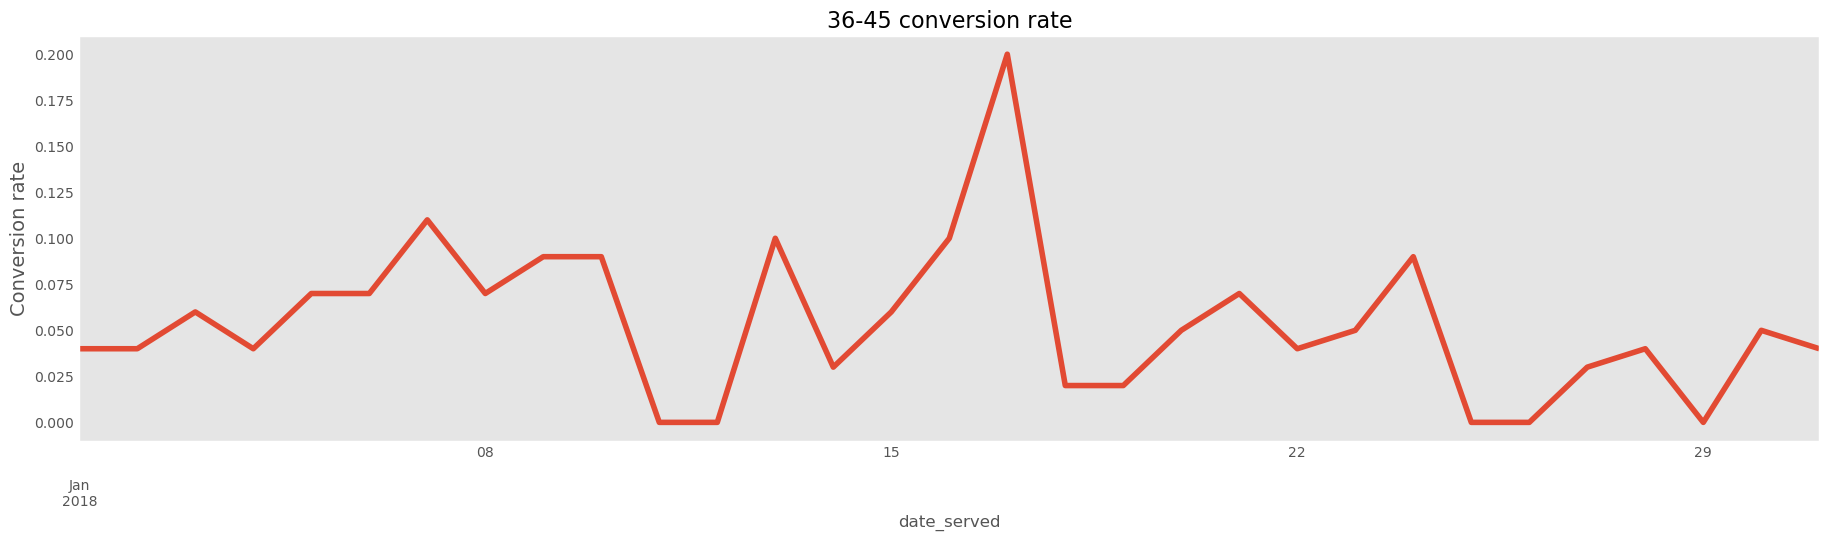

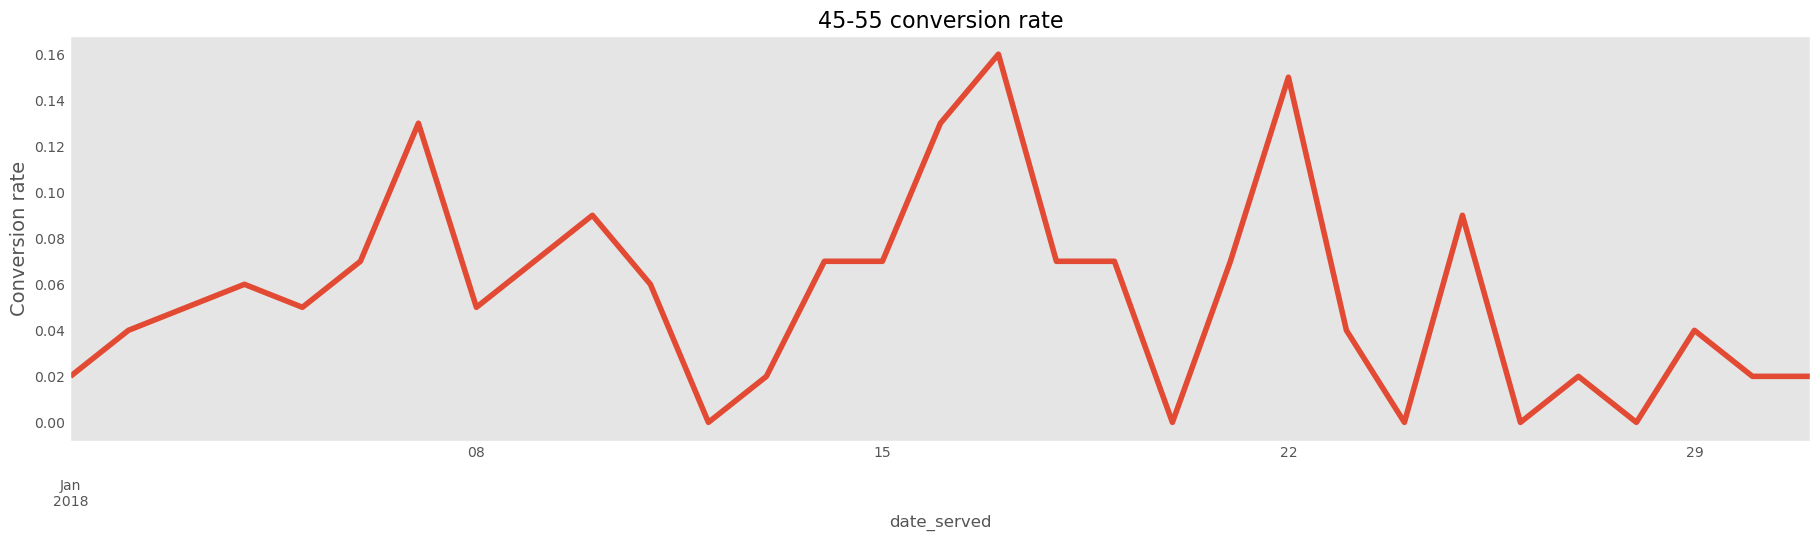

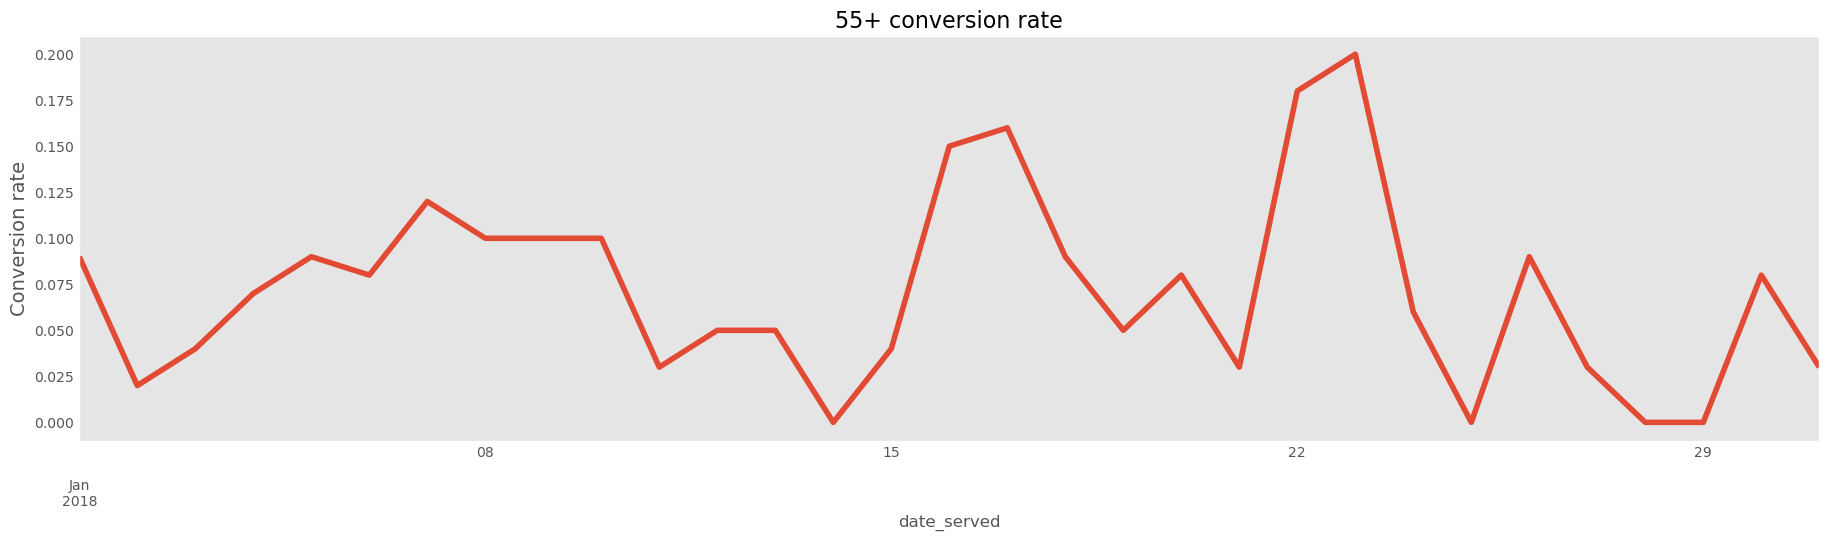

In [50]:
converted_age_date_df=pd.DataFrame(conversion_rate(df,['date_served','age_group']).unstack(level=1))
plotting_conv(converted_age_date_df,"line")

#### Insights:
- Each age group has spike in conversion around 16th
- This is driven by `FB, Insta and Push Ads` as these channels had spike at the same time

#### Conversion Rate Analysis by Marketing Channel and DOW served 

In [51]:
# Creating new column - day of week served 
df['DOW_served']=df['date_served'].dt.strftime("%a")
df['DOW_served'].value_counts()

Mon    1993
Wed    1644
Tue    1629
Sat    1275
Fri    1170
Thu    1156
Sun    1154
Name: DOW_served, dtype: int64

In [52]:
DOW_conversion_df = pd.DataFrame(conversion_rate(df,['DOW_served','marketing_channel']).unstack(level=1))
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DOW_served,,,,,
Fri,0.67,0.11,0.06,0.13,0.06
Mon,0.16,0.12,0.06,0.12,0.06
Sat,0.82,0.11,0.06,0.09,0.07
Sun,0.75,0.12,0.07,0.13,0.07
Thu,0.73,0.13,0.06,0.14,0.07
Tue,0.91,0.15,0.07,0.15,0.12
Wed,0.84,0.13,0.08,0.15,0.11


In [53]:
# Changing the order 

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
DOW_conversion_df = DOW_conversion_df.reindex(weekday_order)
DOW_conversion_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DOW_served,,,,,
Mon,0.16,0.12,0.06,0.12,0.06
Tue,0.91,0.15,0.07,0.15,0.12
Wed,0.84,0.13,0.08,0.15,0.11
Thu,0.73,0.13,0.06,0.14,0.07
Fri,0.67,0.11,0.06,0.13,0.06
Sat,0.82,0.11,0.06,0.09,0.07
Sun,0.75,0.12,0.07,0.13,0.07


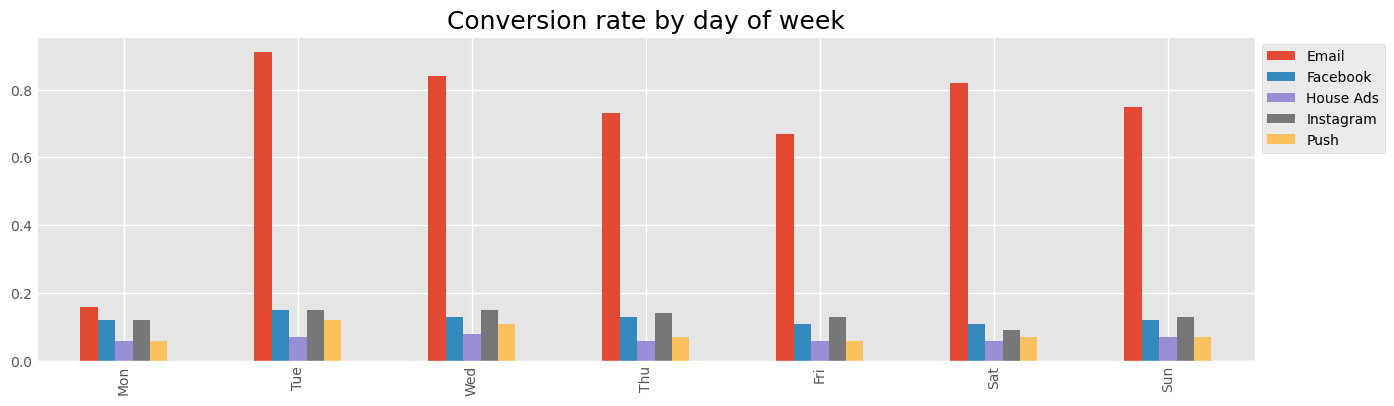

In [54]:
DOW_conversion_df.plot(kind="bar",figsize=(14,4))
plt.title('Conversion rate by day of week',fontsize=18)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1, 1), loc=2);

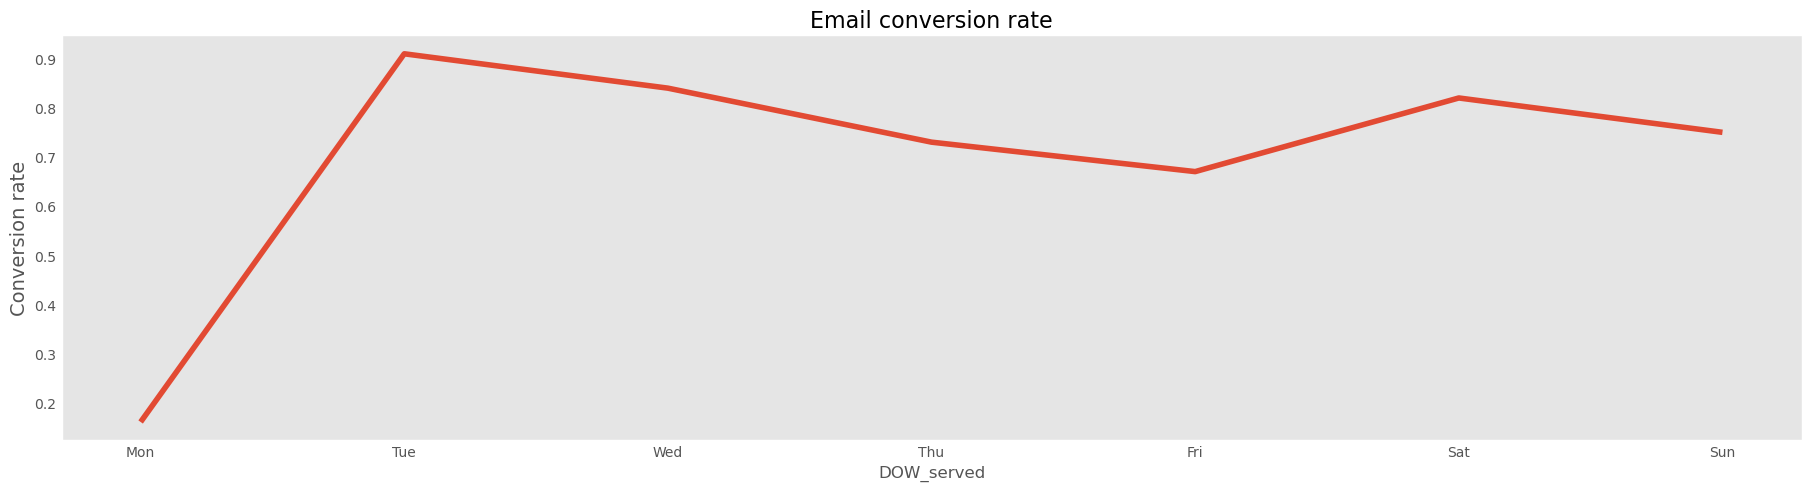

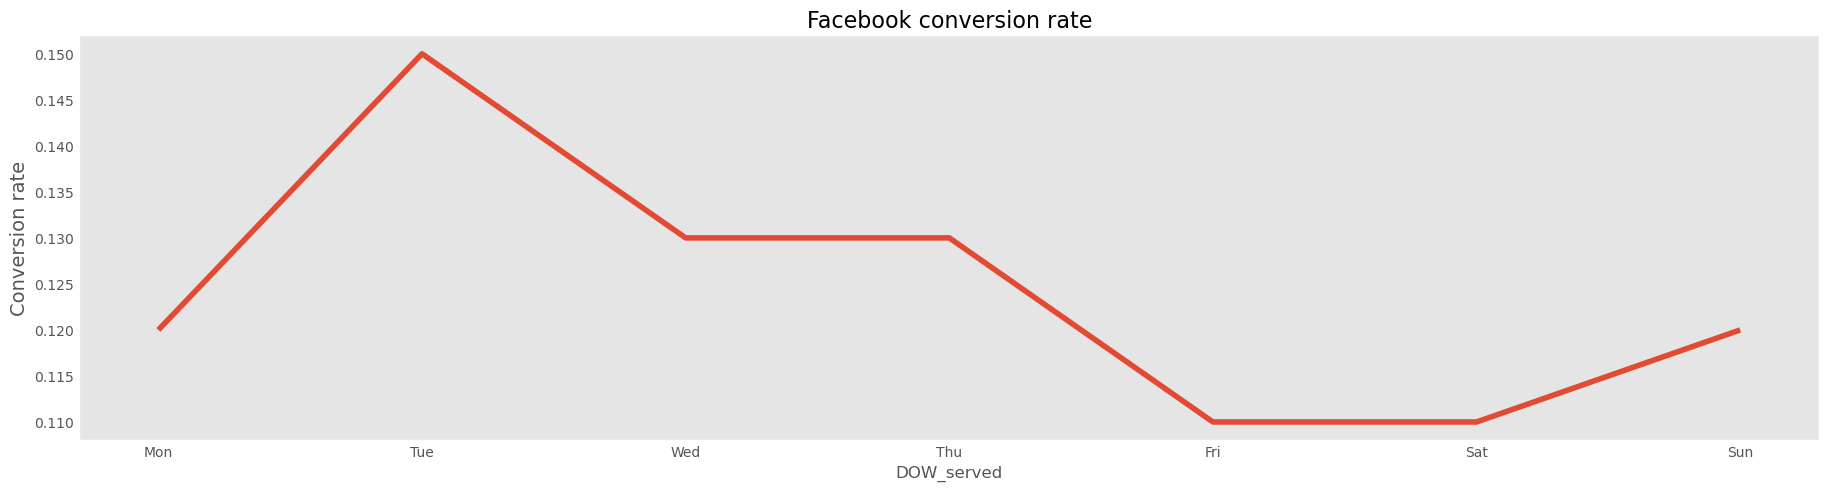

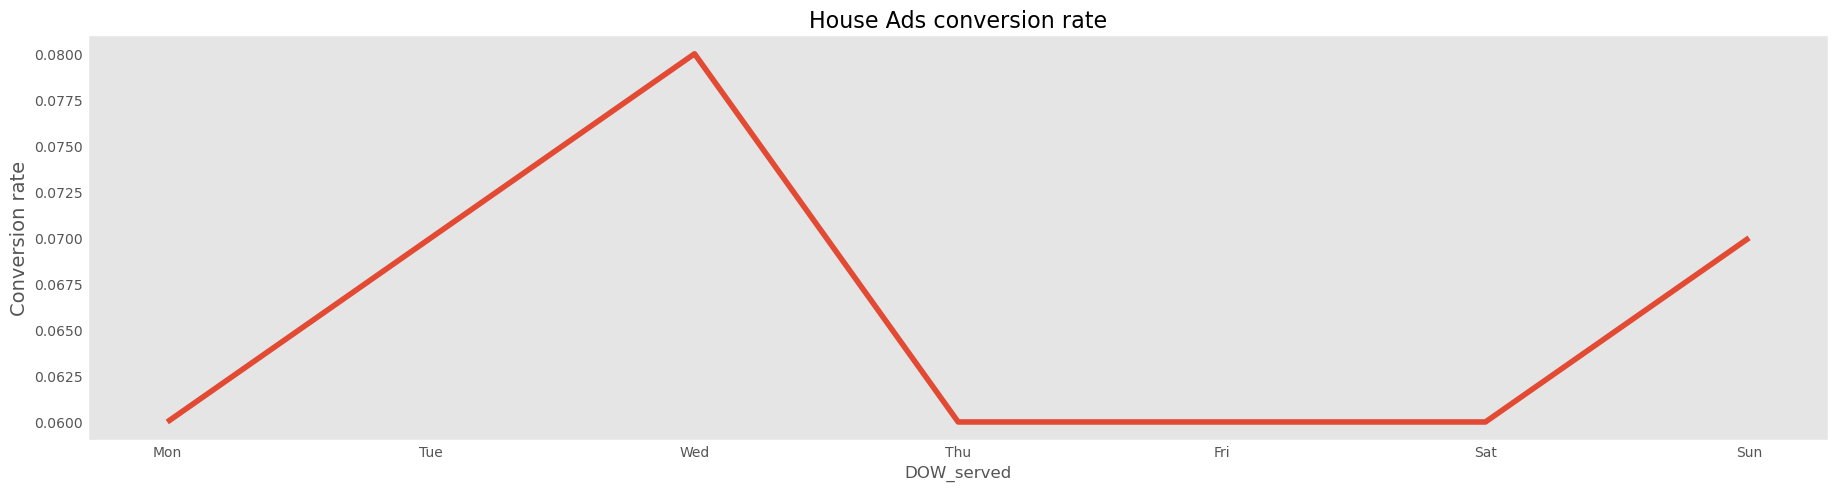

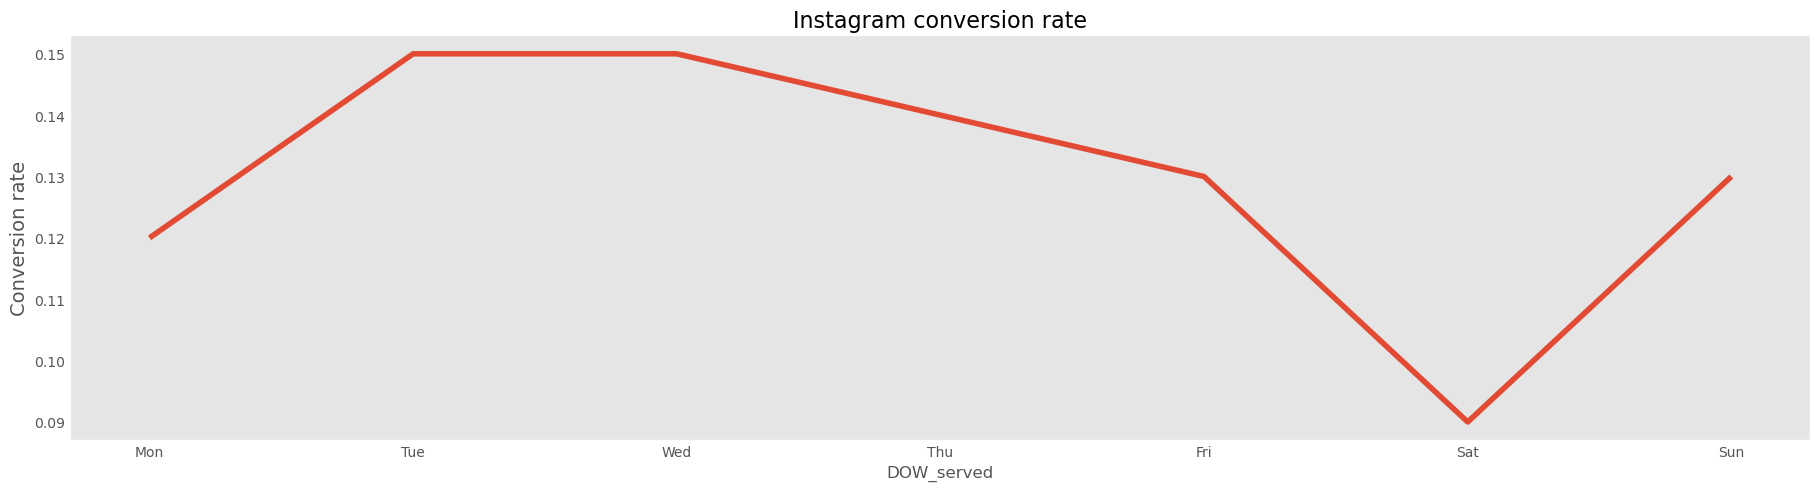

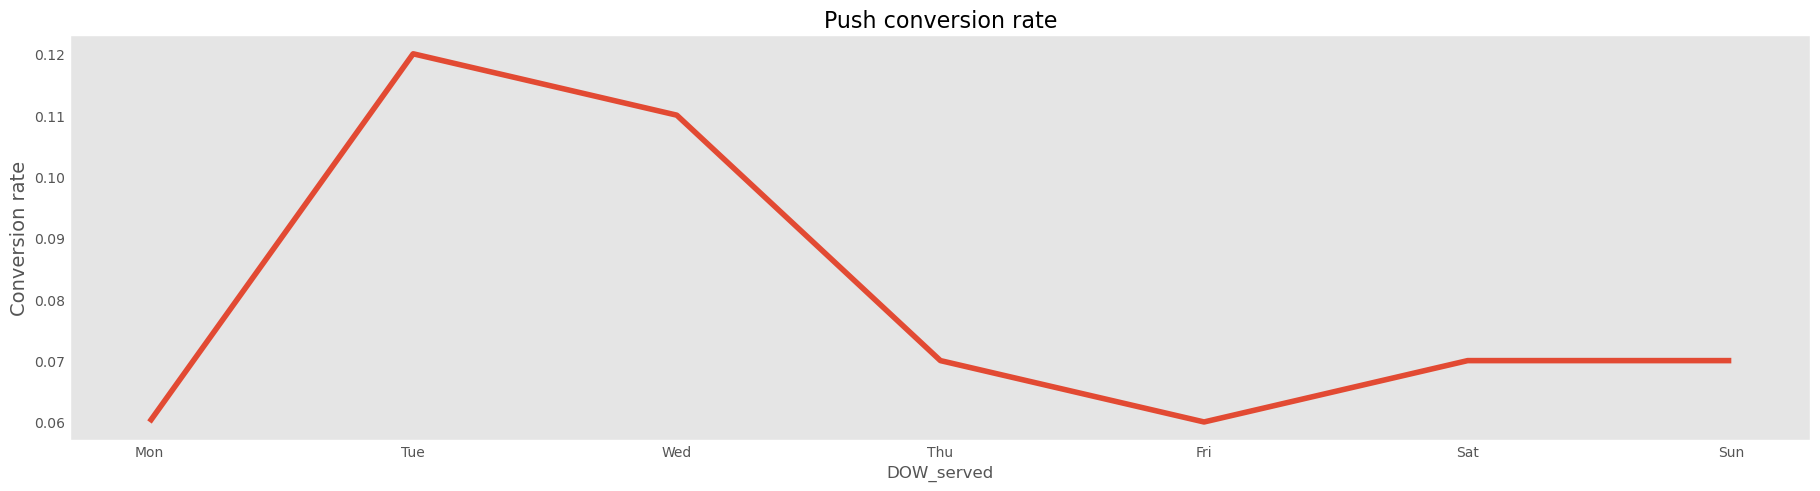

In [55]:
plotting_conv(DOW_conversion_df,"line")

### Detail analysis on House Ads

The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation.

House ads conversion has been down since January 11, you will try to identify potential causes for the decrease.

It's vital to identify if the fluctuations are due to shifts in user behavior (i.e., differences across the day of the week or time of the month) versus a some problem in technical implementation or marketing strategy.

#### House ads Variants conversion rate

In [56]:
Converted_variant_df

,variant,marketing_channel,converted,ads,conversion_rate
0,control,Email,80.0,274,29.20
1,control,Facebook,52.0,894,5.82
2,control,House Ads,172.0,2552,6.74
3,control,Instagram,52.0,888,5.86
4,control,Push,15.0,468,3.21
5,personalization,Email,113.0,291,38.83
6,personalization,Facebook,185.0,966,19.15
7,personalization,House Ads,126.0,2181,5.78
8,personalization,Instagram,213.0,983,21.67
9,personalization,Push,68.0,525,12.95


In [57]:
HouseAds_df = Converted_variant_df[Converted_variant_df['marketing_channel'] == 'House Ads']
HouseAds_df.set_index(['variant','marketing_channel'], inplace=True)
HouseAds_df

,,converted,ads,conversion_rate
variant,marketing_channel,,,
control,House Ads,172.0,2552,6.74
personalization,House Ads,126.0,2181,5.78


Both control & exp group have approx same low conversions rate

#### Weekday vs Weekend House Ads Conversion Rate

In [58]:
house_ads_df = pd.DataFrame(converted_date_df['House Ads'])
house_ads_df.reset_index(inplace=True)
house_ads_df['DOW']=house_ads_df['date_served'].dt.strftime('%w')
house_ads_df.head()

,date_served,House Ads,DOW
0,2018-01-01,0.08,1
1,2018-01-02,0.08,2
2,2018-01-03,0.09,3
3,2018-01-04,0.09,4
4,2018-01-05,0.13,5


In [59]:
house_ads_df['DOW'] = house_ads_df['DOW'].astype(int)

In [60]:
house_ads_df['day type'] = house_ads_df['DOW'].apply(lambda x: "Weekday" if x<=4 else "Weekend")
house_ads_df.head()

,date_served,House Ads,DOW,day type
0,2018-01-01,0.08,1,Weekday
1,2018-01-02,0.08,2,Weekday
2,2018-01-03,0.09,3,Weekday
3,2018-01-04,0.09,4,Weekday
4,2018-01-05,0.13,5,Weekend


In [61]:
print("Conversion rates for House Ads")
print(house_ads_df.groupby("day type")["House Ads"].mean())

Conversion rates for House Ads
day type
Weekday    0.065652
Weekend    0.058750
Name: House Ads, dtype: float64


No real difference in weekday vs weekend house ads conv rates

#### House ads conversion by language

Now that its clear that there are no natural fluctuations across the day of the week and no significant effect of the variant type on conversion through House Ads channel, lets check if language was correctly shown as per the target user preferences.

Perhaps the new marketing campaign does not apply broadly across different cultures.

As we have seen in the univariate analysis of language overall there were mismatch in the prefered language and the displayed language.

In [62]:
df['is_language_correct']=(df['language_displayed']==df['language_preferred'])
print("Total Ads {}".format(len(df['language_displayed'])))
print("Language is not correct for overall {} observations".format(df['is_language_correct'].count()- df['is_language_correct'].sum()))

Total Ads 10037
Language is not correct for overall 522 observations


In [63]:
# For Housing Ads specifically

house_ads_df=df[df['marketing_channel']=='House Ads']
print("Total house ads: {}".format(len(house_ads_df)))
print("House ads with wrong language: {}".format(sum(house_ads_df['language_displayed'] != house_ads_df['language_preferred'])))
print("House ads with correct language: {}".format(sum(house_ads_df['language_displayed'] == house_ads_df['language_preferred'])))
print("House ads conversions: {}".format(house_ads_df['converted'].sum()))

Total house ads: 4733
House ads with wrong language: 453
House ads with correct language: 4280
House ads conversions: 298.0


Thus out of 522 overall wrong language promotions, 453 are of House Ads type

In [64]:
house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)
house_ads_df.head()

/tmp/ipykernel_32/1971611253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads_df['is_language_correct'] = house_ads_df.apply(lambda x: "Yes" if x['language_displayed']==x['language_preferred'] else "No", axis=1)


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DOW_subscribed,is_language_correct,DOW_served
0,a100000029,2018-01-01,House Ads,personalization,1.0,English,English,0-18,2018-01-01,NaT,House Ads,1.0,Mon,Yes,Mon
1,a100000030,2018-01-01,House Ads,personalization,1.0,English,English,19-24,2018-01-01,NaT,House Ads,1.0,Mon,Yes,Mon
2,a100000031,2018-01-01,House Ads,personalization,1.0,English,English,24-30,2018-01-01,NaT,House Ads,1.0,Mon,Yes,Mon
3,a100000032,2018-01-01,House Ads,personalization,1.0,English,English,30-36,2018-01-01,NaT,House Ads,1.0,Mon,Yes,Mon
4,a100000033,2018-01-01,House Ads,personalization,1.0,English,English,36-45,2018-01-01,NaT,House Ads,1.0,Mon,Yes,Mon


In [65]:
house_ads_lang_df=house_ads_df.groupby(['date_served','is_language_correct'])['user_id'].count().unstack(level=1)
house_ads_lang_df.fillna(0,inplace=True)
house_ads_lang_df['Correct %'] = 100*house_ads_lang_df['Yes']/(house_ads_lang_df['No'] + house_ads_lang_df['Yes'])
house_ads_lang_df.round()

is_language_correct,No,Yes,Correct %
date_served,,,
2018-01-01,2.0,189.0,99.0
2018-01-02,3.0,247.0,99.0
2018-01-03,0.0,220.0,100.0
2018-01-04,0.0,168.0,100.0
2018-01-05,0.0,160.0,100.0
2018-01-06,1.0,151.0,99.0
2018-01-07,2.0,130.0,98.0
2018-01-08,0.0,154.0,100.0
2018-01-09,0.0,157.0,100.0


From 11th onwards the conversion rate decreased drastically.

Its clear that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In this exercise, you will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

Bug occured on 11th, so conv rate from 1st to 10th should be considered

In [66]:
house_ads_no_bug = house_ads_df[house_ads_df['date_served']<"2018-01-11"]

# Total House ads with no bug is 1754, the distribution of language preferred
house_ads_no_bug.groupby('language_preferred')['converted'].count()

language_preferred
Arabic       14
English    1592
German       31
Spanish     117
Name: converted, dtype: int64

In [67]:
house_ads_no_bug.groupby('language_preferred')['converted'].sum()

language_preferred
Arabic       7.0
English    142.0
German      12.0
Spanish     17.0
Name: converted, dtype: float64

In [68]:
conv_rates = conversion_rate(house_ads_no_bug,['language_preferred'])
conv_rates_df = pd.DataFrame(conv_rates)
conv_rates_df.reset_index(inplace=True)
conv_rates_df.columns=['Language','Conversion_rate']
conv_rates_df

,Language,Conversion_rate
0,Arabic,0.50
1,English,0.10
2,German,0.44
3,Spanish,0.16


In [69]:
# Finding if languae was correct what would have been conv rate (Thus, will take all house ads )

house_ads_lang_counts=pd.DataFrame(house_ads_df.groupby('language_preferred')['user_id'].count())
house_ads_lang_counts.reset_index(inplace=True)
house_ads_lang_counts.columns=['Language','Ad_Count']
house_ads_lang_counts

,Language,Ad_Count
0,Arabic,107
1,English,4112
2,German,112
3,Spanish,402


In [70]:
house_ads_lang_counts['Expected_Conversion_Count']=house_ads_lang_counts['Ad_Count']*conv_rates_df['Conversion_rate']
house_ads_lang_counts

,Language,Ad_Count,Expected_Conversion_Count
0,Arabic,107,53.50
1,English,4112,411.20
2,German,112,49.28
3,Spanish,402,64.32


In [71]:
print("(Assumption) :- Without bug house ads would have converted: {}".format(house_ads_lang_counts['Expected_Conversion_Count'].sum().round()))

(Assumption) :- Without bug house ads would have converted: 578.0


In [72]:
print("Actual House ads converted: {}".format(house_ads_df["converted"].sum()))

Actual House ads converted: 298.0


## A/B Testing

#### Test allocation

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.

In [73]:
email_df = df[df['marketing_channel']== "Email"]
email_df['variant'].value_counts()

personalization    291
control            274
Name: variant, dtype: int64

#### Comparing conversion rates

- Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. 
- Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. 
- While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.
- The DataFrame email has been loaded in your workspace which contains only rows from the marketing DataFrame where marketing_channel is 'Email'.

In [74]:
subscribers = email_df.groupby(['user_id','variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

In [75]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


#### Creating a lift function

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:

#### Treatment conversion rate - Control conversion rate

The result is the percent difference between the control and treatment.

In this exercise, you will create a function to automate the process of calculating lift. Many marketing teams run tests constantly. The more that you can automate the parts of the process that occur within every test, the more time you will have to do more interesting analyses.

Calculate the mean of a and b using np.mean().

Use a_mean and b_mean to calculate the lift of the treatment.

Print the results of the lift() function you created using the control and personalization variables.

In [76]:
lift = (np.mean(personalization) - np.mean(control))/np.mean(control)
print("Lift is {}%".format(round(lift*100)))

Lift is 39%


#### *Is the lift stat significant?*

A two sample T-test is used to compare the means of two separate samples.

H0: There is no significant difference between mean of both the samples (control and personalization)
H1: There is significant difference between mean of both the samples (control and personalization)

In [77]:
from scipy import stats
stats.ttest_ind(control,personalization)

Ttest_indResult(statistic=-2.7343299447505065, pvalue=0.00645148784469419)

`*Insights:*` Based on the p-value you provided (0.006), which is below the commonly used significance level of 0.05, you would typically reject the null hypothesis. This suggests that there is evidence that the personalized Emails does have a significant impact, and the observed lift of 39% is likely not due to random chance.

The above statistics is for "Email" marekting channel. 

Similarly we can check the statistics for other channels as well as with other sub-segemnts like "Email with language_displayed"

#### Creating a sub sgement function for hypothesis testing

In [78]:
def ab_segmentation(channel,subsegment=None):
    
    if subsegment is None:
        
        subsegmented_df=df[df['marketing_channel']==channel]
    
        subscribers = subsegmented_df.groupby(['user_id','variant'])['converted'].max()
    
        subscribers_df=pd.DataFrame(subscribers.unstack(level=1))
    
        control= subscribers_df['control'].dropna()
    
        personalization= subscribers_df['personalization'].dropna()
    
        lift= (np.mean(personalization)-np.mean(control))/np.mean(control)
    
        print("lift: {}%".format(round(lift*100)))
    
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')
        
    else:
        
        for value in np.unique(df[subsegment].values):
            
            print(value)
  
            subsegmented_df=df[ (df['marketing_channel']==channel) & (df[subsegment]==value) ]
    
            subscribers = subsegmented_df.groupby(['user_id','variant'])['converted'].max()
    
            subscribers_df = pd.DataFrame(subscribers.unstack(level=1))
    
            control= subscribers_df['control'].dropna()
    
            personalization= subscribers_df['personalization'].dropna()
    
            lift= (np.mean(personalization)-np.mean(control))/np.mean(control)
    
            print("lift: {}%".format(round(lift*100)))
            
            print("Count of control & personlization: {} & {}".format(len(control),len(personalization)))
            
            print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')


In [79]:
ab_segmentation("Email")  # Checking the function, same we have calculated earlier

lift: 39%
t-statistic: Ttest_indResult(statistic=-2.7343299447505065, pvalue=0.00645148784469419) 




In [80]:
ab_segmentation("Email","language_displayed")

Arabic
lift: 50%
Count of control & personlization: 5 & 5
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39%
Count of control & personlization: 240 & 248
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -2%
Count of control & personlization: 17 & 27
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 167%
Count of control & personlization: 8 & 4
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [81]:
ab_segmentation("Email","age_group")


0-18
lift: 121%
Count of control & personlization: 41 & 50
t-statistic: Ttest_indResult(statistic=-2.966044912142212, pvalue=0.003872449439129706) 


19-24
lift: 106%
Count of control & personlization: 40 & 67
t-statistic: Ttest_indResult(statistic=-3.0317943847866697, pvalue=0.0030623836114689195) 


24-30
lift: 161%
Count of control & personlization: 41 & 75
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36
lift: -100%
Count of control & personlization: 39 & 21
t-statistic: Ttest_indResult(statistic=3.1859064644147983, pvalue=0.00232384874317653) 


36-45
lift: -85%
Count of control & personlization: 39 & 24
t-statistic: Ttest_indResult(statistic=2.431790127931851, pvalue=0.017975686009788255) 


45-55
lift: -72%
Count of control & personlization: 40 & 24
t-statistic: Ttest_indResult(statistic=2.0654991273179326, pvalue=0.04306233968820123) 


55+
lift: -100%
Count of control & personlization: 30 & 23
t-statistic: Ttest_indResult(stati

In [82]:
ab_segmentation("Instagram")

lift: 380%
t-statistic: Ttest_indResult(statistic=-10.749635585136122, pvalue=3.6595188397777727e-26) 




In [88]:
ab_segmentation("Instagram","age_group")

0-18
lift: 532%
Count of control & personlization: 125 & 168
t-statistic: Ttest_indResult(statistic=-4.420030279559059, pvalue=1.3945853816242439e-05) 


19-24
lift: 1007%
Count of control & personlization: 115 & 187
t-statistic: Ttest_indResult(statistic=-8.919549191849601, pvalue=4.71470086122104e-17) 


24-30
lift: 542%
Count of control & personlization: 125 & 146
t-statistic: Ttest_indResult(statistic=-5.770186139845332, pvalue=2.174138604598001e-08) 


30-36
lift: 171%
Count of control & personlization: 145 & 107
t-statistic: Ttest_indResult(statistic=-1.741921733197327, pvalue=0.08275202630134179) 


36-45
lift: 145%
Count of control & personlization: 160 & 109
t-statistic: Ttest_indResult(statistic=-1.8514991272922312, pvalue=0.06520183209266825) 


45-55
lift: 21%
Count of control & personlization: 114 & 106
t-statistic: Ttest_indResult(statistic=-0.4071322043730024, pvalue=0.6843103638809036) 


55+
lift: -39%
Count of control & personlization: 63 & 137
t-statistic: Ttest_indR

In [90]:
ab_segmentation("House Ads")

lift: -22%
t-statistic: Ttest_indResult(statistic=2.1809191866658924, pvalue=0.029247338578929298) 




In [91]:
ab_segmentation("House Ads","language_displayed")

Arabic
lift: 200%
Count of control & personlization: 15 & 2
t-statistic: Ttest_indResult(statistic=-1.8786728732554485, pvalue=0.07986469403148265) 


English
lift: -14%
Count of control & personlization: 1987 & 1917
t-statistic: Ttest_indResult(statistic=1.2347689464136162, pvalue=0.21699085684198718) 


German
lift: -71%
Count of control & personlization: 10 & 17
t-statistic: Ttest_indResult(statistic=3.2824397594488732, pvalue=0.003033996296691305) 


Spanish
lift: -69%
Count of control & personlization: 95 & 19
t-statistic: Ttest_indResult(statistic=1.291566402296495, pvalue=0.19916641430963414) 


